In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,accuracy_score
import numpy as np


In [2]:
# Load dataset
dataset = pd.read_csv('twitter_dataset.csv')
dataset.head()

,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,2016-10-15 21:32:11,False,False,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,False,787405734442958848,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,False,7.870,1403,bot
1,2016-11-09 05:01:30,False,False,Photographing the American West since 1980. I ...,536,860,880,False,796216118331310080,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,False,0.183,1379,human
2,2017-06-17 05:34:27,False,False,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,True,875949740503859204,en,"Los Angeles, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1278890453...,SVGEGENT,1001,False,0.864,1159,human
3,2016-07-21 13:32:25,True,False,Wife.Godmother.Friend.Feline Fanatic! Assistan...,8433,517,633,True,756119643622735875,en,"Birmingham, AL",NaN,http://pbs.twimg.com/profile_images/1284884924...,TinkerVHELPK5,1324,False,0.889,1489,human
4,2012-01-15 16:32:35,False,False,Loan coach at @mancity & Aspiring DJ,88,753678,116,True,464781334,en,"England, United Kingdom",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9952566258...,JoleonLescott,4202,True,1.339,3138,human


In [3]:
# menghapus username yang sama
dataset = dataset.drop_duplicates(subset=['screen_name'])
print(len(dataset))

37438


In [4]:
# Functions untuk preprocessing ke Dataframe
def convert_bool_to_int(data: pd.DataFrame, boolean_cols: list):
    try:
        for col in boolean_cols:
            data[col] = data[col].astype(int)
    except Exception as e:
        print(e)
    return data

# def popularity_metric(friends_count: int, followers_count: int):
#     return np.round(np.log(1+friends_count) * np.log(1+followers_count), 3)


# def compute_popularity_metric(row):
#     return popularity_metric(friends_count=row["friends_count"],
#                              followers_count=row["followers_count"])
def compute_reputation(row):
    if row['followers_count'] == 0 or row['friends_count'] == 0:
        return 0
    else:
        return row['followers_count'] / (row['followers_count'] + row['friends_count'])


In [5]:
# Preprocessing menjadikan ke boolean kolom
boolean_cols: list = ["default_profile", "default_profile_image",
                      "geo_enabled", "verified","lang"]
twitter_accounts_df = convert_bool_to_int(data=dataset, boolean_cols=boolean_cols)
twitter_accounts_df.head()

invalid literal for int() with base 10: 'en'


,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,2016-10-15 21:32:11,0,0,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,0,787405734442958848,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,0,7.870,1403,bot
1,2016-11-09 05:01:30,0,0,Photographing the American West since 1980. I ...,536,860,880,0,796216118331310080,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,0,0.183,1379,human
2,2017-06-17 05:34:27,0,0,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,1,875949740503859204,en,"Los Angeles, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1278890453...,SVGEGENT,1001,0,0.864,1159,human
3,2016-07-21 13:32:25,1,0,Wife.Godmother.Friend.Feline Fanatic! Assistan...,8433,517,633,1,756119643622735875,en,"Birmingham, AL",NaN,http://pbs.twimg.com/profile_images/1284884924...,TinkerVHELPK5,1324,0,0.889,1489,human
4,2012-01-15 16:32:35,0,0,Loan coach at @mancity & Aspiring DJ,88,753678,116,1,464781334,en,"England, United Kingdom",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9952566258...,JoleonLescott,4202,1,1.339,3138,human


In [6]:
#Feature avg_word
twitter_accounts_df['description'] = twitter_accounts_df['description'].astype(str)
twitter_accounts_df['description_word_count'] = twitter_accounts_df['description'].apply(lambda x: len(str(x).split()))
twitter_accounts_df['description_character_count'] = twitter_accounts_df['description'].apply(lambda x: sum(len(word) for word in str(x).split()))
twitter_accounts_df['avg_word'] = twitter_accounts_df['description_character_count'] / twitter_accounts_df['description_word_count']
twitter_accounts_df.head()

,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,...,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type,description_word_count,description_character_count,avg_word
0,2016-10-15 21:32:11,0,0,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,0,787405734442958848,en,...,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,0,7.870,1403,bot,18,112,6.222222
1,2016-11-09 05:01:30,0,0,Photographing the American West since 1980. I ...,536,860,880,0,796216118331310080,en,...,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,0,0.183,1379,human,24,137,5.708333
2,2017-06-17 05:34:27,0,0,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,1,875949740503859204,en,...,http://pbs.twimg.com/profile_images/1278890453...,SVGEGENT,1001,0,0.864,1159,human,10,71,7.100000
3,2016-07-21 13:32:25,1,0,Wife.Godmother.Friend.Feline Fanatic! Assistan...,8433,517,633,1,756119643622735875,en,...,http://pbs.twimg.com/profile_images/1284884924...,TinkerVHELPK5,1324,0,0.889,1489,human,9,89,9.888889
4,2012-01-15 16:32:35,0,0,Loan coach at @mancity & Aspiring DJ,88,753678,116,1,464781334,en,...,http://pbs.twimg.com/profile_images/9952566258...,JoleonLescott,4202,1,1.339,3138,human,7,30,4.285714


In [7]:
#Feture Entrophy
# Mengubah tipe data kolom 'created_at' menjadi datetime
twitter_accounts_df['created_at'] = pd.to_datetime(twitter_accounts_df['created_at'], format='%Y-%m-%d %H:%M:%S')
#menugurutkan
twitter_accounts_df.sort_values(["screen_name", "created_at"])
print(len(twitter_accounts_df))

37438


In [8]:
twitter_accounts_df['time_diff'] = (twitter_accounts_df['created_at'] - twitter_accounts_df['created_at'].shift()).abs()  / np.timedelta64(1, 'h')
print(len(twitter_accounts_df))

37438


In [9]:
#fill missing value in time_diff with zero
twitter_accounts_df['time_diff'] = twitter_accounts_df['time_diff'].fillna(0)
print(len(twitter_accounts_df))

37438


In [10]:
#there is 50 tweet per user extracted, so n=50
g_sum = 50 
print(len(twitter_accounts_df))

37438


In [11]:
#measure the probability for this interval
values = twitter_accounts_df['time_diff']/g_sum
print(len(twitter_accounts_df))

37438


In [12]:
#time interval entropy
twitter_accounts_df['Entropy'] = -(values*np.log(values))
print(len(twitter_accounts_df))

37438


C:\Users\xotiss\AppData\Roaming\Python\Python39\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [13]:
#fill missing value in entropy column with zero
twitter_accounts_df['Entropy']=twitter_accounts_df['Entropy'].fillna(0)
print(len(twitter_accounts_df))

37438


In [14]:
#if value is negative, it will be eliminated. The reason is because it was an outlier
# twitter_accounts_df.drop(twitter_accounts_df[twitter_accounts_df.Entropy < 0].index, inplace=True) 
# print(len(twitter_accounts_df))

In [15]:
twitter_accounts_df.drop(['time_diff'], axis=1, inplace=True)
print(len(twitter_accounts_df))

37438


In [16]:
#Feature Reputation
# Create a custom metric to measure the popularity of an input account
twitter_accounts_df["reputation"] = twitter_accounts_df.apply(compute_reputation, axis=1)

# Let's show some examples of such value
twitter_accounts_df[['reputation']]

,reputation
0,0.997489
1,0.494253
2,0.224543
3,0.449565
4,0.999846
...,...
37433,0.111736
37434,0.999461
37435,0.997786
37436,0.453947


In [17]:
twitter_accounts_df.head()
print(len(twitter_accounts_df))

37438


In [18]:
# Group by username and compute mean of parameter
# grouped = twitter_accounts_df.groupby('screen_name')
# groupie = grouped.agg(np.mean)
# groupie.drop(['time_diff'], axis=1, inplace=True)
# # Display the result
# groupie.head()
# groupie.to_csv('hasil_preprocessing.csv')

In [19]:
# EDA

import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt
from collections import OrderedDict

mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['figure.figsize'] = 12, 8
mpl.rcParams['font.sans-serif'] = ['Tahoma']
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [20]:
# Set up some parameters for EDA
palette: str = "husl"
grouped: str = "account_type"
default_value: str = "unknown"



In [21]:
import logging
logger = logging.getLogger(__name__)

def get_labels_colors_from_pandas_column(df: pd.DataFrame, column: str, palette: str):
    data_labels: dict = dict()
    try:
        labels: list = df[column].unique().tolist()
        colors: list = sns.color_palette(palette, len(labels))
        data_labels: dict = dict(zip(labels, colors))
    except Exception as e:
        logger.error(e)
    return data_labels

# Retrieve labels and additional parameters to plot figures
data_labels: dict = get_labels_colors_from_pandas_column(
    df=twitter_accounts_df, column=grouped, palette=palette)


In [22]:
# Show labels
print(f"Unique Target values: {data_labels.keys()}")

Unique Target values: dict_keys(['bot', 'human'])


In [23]:
# Functions to plot data distributions
def plot_multiple_histograms(data: pd.DataFrame,
                             grouped_col: str,
                             target_col: str,
                             data_labels: dict):
    # Plot
    plt.figure(figsize=(12, 10))
    title = "\n"
    labels: list = list(data_labels.keys())
    for j, i in enumerate(labels):
        x = data.loc[data[grouped_col] == i, target_col]
        mu_x = round(float(np.mean(x)), 3)
        sigma_x = round(float(np.std(x)), 3)
        ax = sns.distplot(x, color=data_labels.get(i), label=i, hist_kws=dict(alpha=.1),
                          kde_kws={'linewidth': 2})
        ax.axvline(mu_x, color=data_labels.get(i), linestyle='--')
        ax.set(xlabel=f"{target_col.title()}", ylabel='Density')
        title += f"Parameters {str(i)}: $G(\mu=$ {mu_x}, $\sigma=$ {sigma_x} \n"
        ax.set_title(title)
    plt.legend(title="Account Type")
    plt.grid()
    plt.tight_layout()
    plt.show()


def plot_multiple_boxplots(data: pd.DataFrame, grouped_col: str, target_col: str,
                           palette: str = "husl"):
    plt.figure(figsize=(12, 10))

    means: dict = data.groupby([grouped_col])[target_col].mean().to_dict(OrderedDict)
    counter: int = 0

    bp = sns.boxplot(x=grouped_col, y=target_col, data=data, palette=palette, order=list(means.keys()))
    bp.set(xlabel='', ylabel=f"{target_col.title()}")
    ax = bp.axes

    for k, v in means.items():
        # every 4th line at the interval of 6 is median line
        # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
        mean = round(v, 2)
        ax.text(
            counter,
            mean,
            f'{mean}',
            ha='center',
            va='center',
            fontweight='bold',
            size=10,
            color='white',
            bbox=dict(facecolor='#445A64'))
        counter += 1
    bp.figure.tight_layout()
    plt.grid()
    plt.show()

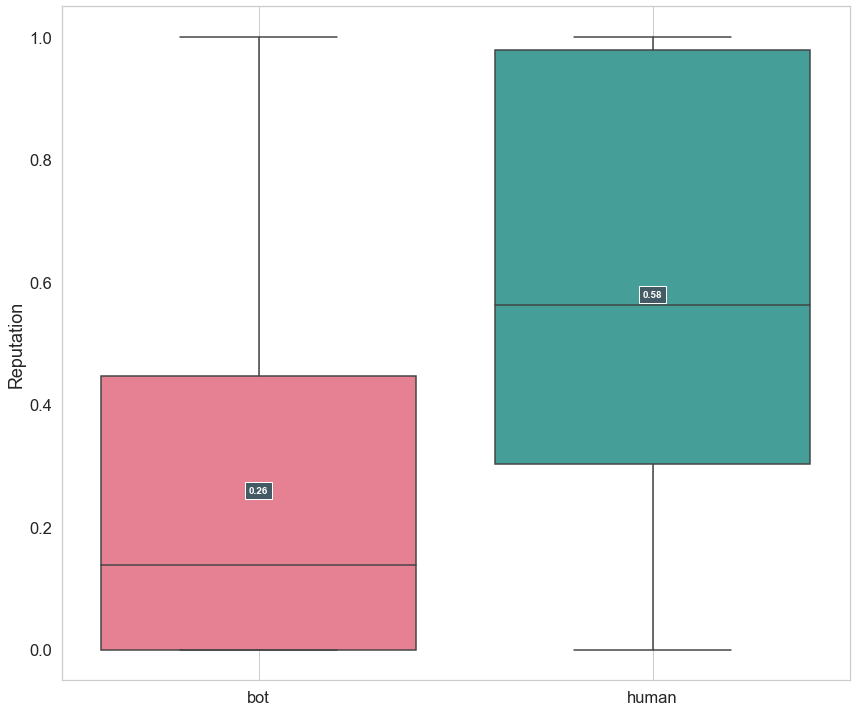

In [24]:
target: str = "reputation"  
# Extract histograms
# plot_multiple_histograms(data=twitter_accounts_df, 
#                          grouped_col=grouped,
#                          data_labels=data_labels,
#                          target_col=target)
# Extract Box-plots
plot_multiple_boxplots(data=twitter_accounts_df,
                       grouped_col=grouped,
                       target_col=target,
                       palette=palette)



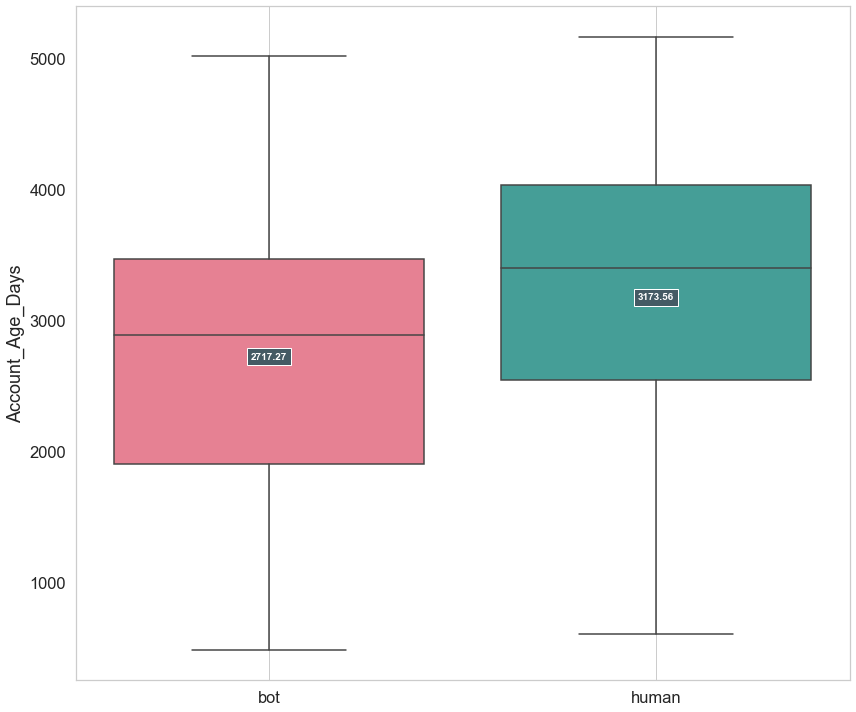

In [25]:
# analyse the average tweets per day
target: str = "account_age_days"  
# # Extract histograms
# plot_multiple_histograms(data=twitter_accounts_df, 
#                          grouped_col=grouped,
#                          data_labels=data_labels,
#                          target_col=target)
# Extract Box-plots
plot_multiple_boxplots(data=twitter_accounts_df,
                       grouped_col=grouped,
                       target_col=target,
                       palette=palette)

<AxesSubplot:xlabel='account_type'>

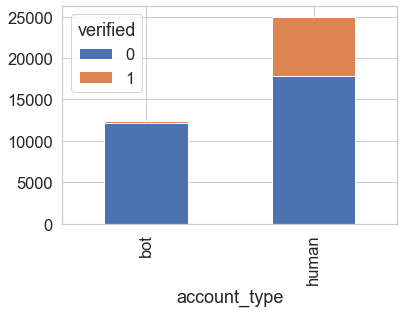

In [26]:
target_col: str = "verified"
twitter_accounts_df2 = twitter_accounts_df.groupby([grouped, target_col])[grouped].count().unstack(target_col)
twitter_accounts_df2.plot(kind='bar', stacked=True)

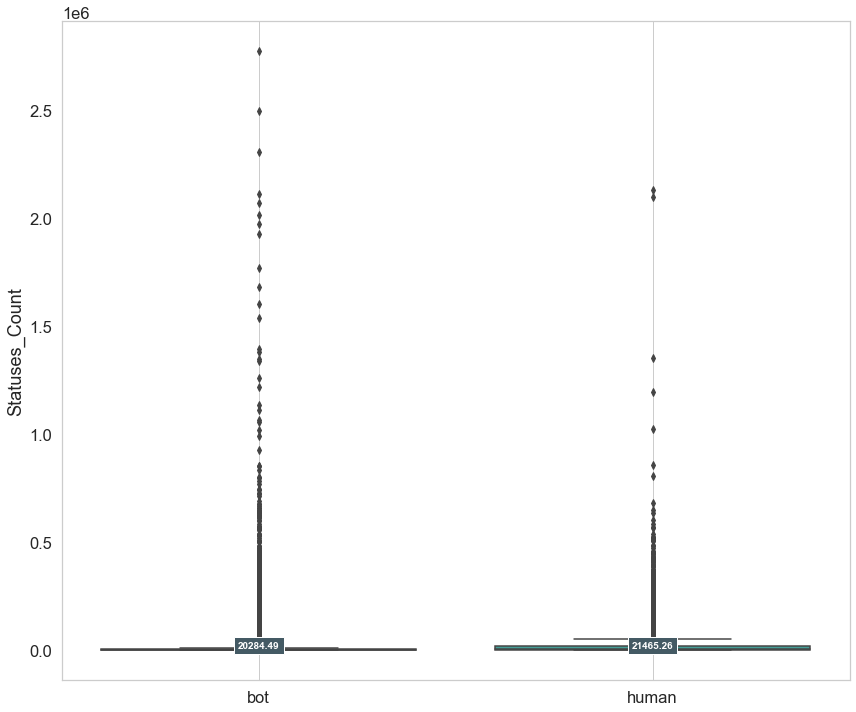

In [27]:
target: str = "statuses_count"  
# Extract histograms
# plot_multiple_histograms(data=twitter_accounts_df, 
#                          grouped_col=grouped,
#                          data_labels=data_labels,
#                          target_col=target)
# Extract Box-plots
plot_multiple_boxplots(data=twitter_accounts_df,
                       grouped_col=grouped,
                       target_col=target,
                       palette=palette)

In [28]:
twitter_accounts_df.describe().to_excel('descriptive_statistics3.xlsx')
print(twitter_accounts_df)

               created_at  default_profile  default_profile_image  \
0     2016-10-15 21:32:11                0                      0   
1     2016-11-09 05:01:30                0                      0   
2     2017-06-17 05:34:27                0                      0   
3     2016-07-21 13:32:25                1                      0   
4     2012-01-15 16:32:35                0                      0   
...                   ...              ...                    ...   
37433 2009-08-08 13:11:15                1                      0   
37434 2013-01-05 21:35:37                0                      0   
37435 2013-01-14 18:05:54                1                      0   
37436 2012-09-10 16:12:02                0                      0   
37437 2011-12-12 12:59:28                0                      0   

                                             description  favourites_count  \
0      Blame @xaiax, Inspired by @MakingInvisible, us...                 4   
1      Photogra

In [29]:
twitter_accounts_df.head()
twitter_accounts_df.to_csv('cek.csv')

In [30]:
from sklearn.preprocessing import MinMaxScaler
# twitter_accounts_df = twitter_accounts_df.drop('created_at', axis=1)
# drop kolom "created_at"
twitter_accounts_df.drop(labels=["lang"], axis=1, inplace=True)

# scaling menggunakan MinMaxScaler pada fitur-fitur yang tersisa
scaler = MinMaxScaler(feature_range=(0,100))
rescaledX = scaler.fit_transform(twitter_accounts_df)

# Membuat DataFrame dari data yang telah discaling
# scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

# Menyimpan DataFrame ke dalam file CSV
# scaled_df.to_csv('data_scaled.csv', index=False)

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [ ]:
# Preprocess Response variable (account type)
twitter_accounts_df[grouped] = twitter_accounts_df[grouped].astype('category')
twitter_accounts_df.dtypes

In [ ]:
twitter_accounts_df[grouped] = twitter_accounts_df[grouped].cat.codes
twitter_accounts_df.head()

In [ ]:
twitter_accounts_df_num: pd.DataFrame = twitter_accounts_df.copy()
twitter_accounts_df_num: pd.DataFrame = twitter_accounts_df_num._get_numeric_data()
twitter_accounts_df_num.head()

In [ ]:
# Remove columns
drop_cols: list = ["id"]
twitter_accounts_df_num.drop(drop_cols, axis=1,inplace=True)
twitter_accounts_df_num.head()

In [ ]:
# Compute correlation among the features and the response variable
corr: pd.DataFrame = twitter_accounts_df_num.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot = True, fmt='.1g', cmap= 'coolwarm')

In [ ]:
# twitter_accounts_df_num.corr().to_excel('descriptive_statistics.xlsx')# 

In [ ]:
twitter_accounts_df_num.head()
fitur = twitter_accounts_df_num

In [ ]:
# fitur = dataset[['verified', 'default_profile','default_profile_image','favourites_count','followers_count','friends_count','geo_enabled','statuses_count','verified','average_tweets_per_day']]
# fitur = twitter_account_df_num
# Pilih label yang akan digunakan
label = dataset['account_type']

# Pisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(fitur, label, test_size=0.2, random_state=42)

# Membuat model Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model dengan data latih
model.fit(X_train, y_train)

plt.bar(fitur.columns, model.feature_importances_)
plt.xticks(rotation=90)
plt.show()

# Memprediksi label pada data uji
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# membuat plot confusion matrix
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(cm)